# Analysis of human experimental studies

This notebook analyzes data from the human experimental setup, where images from each of the 21 images at varying circle whiteness levels were presented in random order and the subject scored the magnitude of illusion on a scale of 0 (no illusion) to 5 (very apparent illusion). Studies were completed by both authors for the Scintillating Grid, the No Lines control grid, and for a natural image masked grid (e.g. cheetah image).

The images were displayed on different screens, which should not affect the results since the Scintillating Grid effect is very robust.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['axes.spines.top'] = False
import pylab as pl
from scipy import stats

In [2]:
def order_by_whiteness (df):
    ordered_df = df.copy()
    whiteness = []
    for filepath in df['filepath']:
        end_tag = filepath.split('_')[-1] # get last section
        end_tag = end_tag.split('\\')[-1]
        val_tag = end_tag.split('.')[0] # get first part (i.e. remove ".png")
        whiteness.append(float(val_tag))
    ordered_df['whiteness'] = whiteness
    ordered_df = ordered_df.sort_values('whiteness')
    return (ordered_df)

In [3]:
# Read in results files

# Scintillating Grid
SG_ES_ordered_dfs = []
for filepath in ['SG_ES_1.txt', 'SG_ES_2.txt', 'SG_ES_3.txt', 'SG_ES_4.txt', 'SG_ES_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SG_ES_ordered_dfs.append(ordered_df)
SG_ES = SG_ES_ordered_dfs[0].copy()
SG_ES['score'] = np.mean([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],axis=0)
SG_ES['stdev'] = np.std([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],axis=0)
SG_ES['25'] = np.percentile([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],25,axis=0)
SG_ES['75'] = np.percentile([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],75,axis=0)


SG_RD_ordered_dfs = []
for filepath in ['SG_RD_1.txt', 'SG_RD_2.txt', 'SG_RD_3.txt', 'SG_RD_4.txt', 'SG_RD_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SG_RD_ordered_dfs.append(ordered_df)
SG_RD = SG_RD_ordered_dfs[0].copy()
SG_RD['score'] = np.mean([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],axis=0)
SG_RD['stdev'] = np.std([(SG_RD_ordered_dfs[i]['score']-1)*5/4 for i in range(len(SG_RD_ordered_dfs))],axis=0)
SG_RD['25'] = np.percentile([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],25,axis=0)
SG_RD['75'] = np.percentile([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],75,axis=0)


# No Lines Control
NL_ES_ordered_dfs = []
for filepath in ['NL_ES_1.txt', 'NL_ES_2.txt', 'NL_ES_3.txt', 'NL_ES_4.txt', 'NL_ES_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    NL_ES_ordered_dfs.append(ordered_df)
NL_ES = NL_ES_ordered_dfs[0].copy()
NL_ES['score'] = np.mean([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],axis=0)
NL_ES['stdev'] = np.std([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],axis=0)
NL_ES['25'] = np.percentile([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],25,axis=0)
NL_ES['75'] = np.percentile([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],75,axis=0)

NL_RD_ordered_dfs = []
for filepath in ['NL_RD_1.txt', 'NL_RD_2.txt', 'NL_RD_3.txt', 'NL_RD_4.txt', 'NL_RD_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    NL_RD_ordered_dfs.append(ordered_df)
NL_RD = NL_RD_ordered_dfs[0].copy()
NL_RD['score'] = np.mean([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],axis=0)
NL_RD['stdev'] = np.std([(NL_RD_ordered_dfs[i]['score']-1)*5/4 for i in range(len(NL_RD_ordered_dfs))],axis=0)
NL_RD['25'] = np.percentile([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],25,axis=0)
NL_RD['75'] = np.percentile([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],75,axis=0)

# Masked Control (Natural Image)
MC_ES_ordered_dfs = []
for filepath in ['MC_ES_1.txt', 'MC_ES_2.txt', 'MC_ES_3.txt', 'MC_ES_4.txt', 'MC_ES_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    MC_ES_ordered_dfs.append(ordered_df)
MC_ES = MC_ES_ordered_dfs[0].copy()
MC_ES['score'] = np.mean([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],axis=0)
MC_ES['stdev'] = np.std([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],axis=0)
MC_ES['25'] = np.percentile([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],25,axis=0)
MC_ES['75'] = np.percentile([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],75,axis=0)

MC_RD_ordered_dfs = []
for filepath in ['MC_RD_1.txt', 'MC_RD_2.txt', 'MC_RD_3.txt', 'MC_RD_4.txt', 'MC_RD_5.txt']:
    df = pd.read_csv('human_data/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    MC_RD_ordered_dfs.append(ordered_df)
MC_RD = MC_RD_ordered_dfs[0].copy()
MC_RD['score'] = np.mean([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],axis=0)
MC_RD['stdev'] = np.std([(MC_RD_ordered_dfs[i]['score']-1)*5/4 for i in range(len(MC_RD_ordered_dfs))],axis=0)
MC_RD['25'] = np.percentile([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],25,axis=0)
MC_RD['75'] = np.percentile([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],75,axis=0)

In [13]:
# Read in DNN responses

### Code from CurveDecomp.ipynb ###

def DecomposeMonotonic (filename, saved_name, human_point, frange_list, title, x_title, neural_net, 
                      locleg=1, plotorig='yes', metric='all', show_save='no',
                  norm=False, layer_idx=-1):
    
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    # Transposes files from the original DNN Dissimilarity results output
    transposed_file = imported_file.T
    
    try:
        fc8_diss_values = transposed_file[layer_idx] # records fc8 layer outputs
    except:
        raise Exception (filename + ' does not have idx ' + str(layer_idx))
        
    fc8_diss_values = fc8_diss_values.tolist()
    del fc8_diss_values[0]
    taskNames = pl.frange(frange_list[0], frange_list[1], frange_list[2])   
    
    # NORMALIZE by average
    if norm is True:
        divisor = np.mean(fc8_diss_values)
        fc8_diss_values = [fc8/divisor for fc8 in fc8_diss_values]
    
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]
    
    fc8_diss_values = fc8_diss_values[::-1] # FLIP SO INCREASING WHITENESS (not done in others)

    # DECOMPOSITION
    ill_diss = []
    top_val = 0
    for i, diss_val in enumerate(fc8_diss_values):
        if diss_val > top_val:
            top_val = diss_val
            ill_diss.append(0)
        else:
            ill_diss.append(top_val-diss_val)
        
    # SCORES
    score = ill_diss[-1]
    
    if show_save == 'yes':
        plt.plot(taskNames, ill_diss, 'g', label='Negative Illusion')
        if plotorig == 'yes':
            plt.plot(taskNames, fc8_diss_values, 'k--', label='Dissimilarity')
        plt.title(title + ' (decomposed)')
        plt.xlabel(x_title)
        plt.ylabel('Minimum Deviation from Monotonicity')
        plt.legend(loc=locleg, numpoints=1)
        plt.annotate('Initial Illusion = ' + str(round(score1, 3)), xy=(0.05, 0.05), xycoords='axes fraction')
        plt.savefig('Figures/FIGURES/'+saved_name+'_decompMonotonic.png')
        plt.show()

    return (ill_diss, score)

# Final results

In [9]:
def order_by_whiteness (df):
    ordered_df = df.copy()
    whiteness = []
    for filepath in df['filepath']:
        end_tag = filepath.split('_')[-1] # get last section
        end_tag = end_tag.split('\\')[-1]
        val_tag = end_tag.split('.')[0] # get first part (i.e. remove ".png")
        val_tag = val_tag.split('y')[1]
        whiteness.append(float(val_tag)/21)
    ordered_df['whiteness'] = whiteness
    ordered_df = ordered_df.sort_values('whiteness')
    return (ordered_df)

In [11]:
# Read in results files

# Scintillating Grid
SG_ES_ordered_dfs = []
for filepath in ['ES1_SG.txt', 'ES2_SG.txt', 'ES3_SG.txt', 'ES4_SG.txt', 'ES5_SG.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SG_ES_ordered_dfs.append(ordered_df)
SG_ES = SG_ES_ordered_dfs[0].copy()
SG_ES['score'] = np.mean([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],axis=0)
SG_ES['stdev'] = np.std([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],axis=0)
SG_ES['25'] = np.percentile([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],25,axis=0)
SG_ES['75'] = np.percentile([SG_ES_ordered_dfs[i]['score'] for i in range(len(SG_ES_ordered_dfs))],75,axis=0)


SG_RD_ordered_dfs = []
for filepath in ['RD1_SG.txt', 'RD2_SG.txt', 'RD3_SG.txt', 'RD4_SG.txt', 'RD5_SG.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SG_RD_ordered_dfs.append(ordered_df)
SG_RD = SG_RD_ordered_dfs[0].copy()
SG_RD['score'] = np.mean([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],axis=0)
SG_RD['stdev'] = np.std([(SG_RD_ordered_dfs[i]['score']) for i in range(len(SG_RD_ordered_dfs))],axis=0)
SG_RD['25'] = np.percentile([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],25,axis=0)
SG_RD['75'] = np.percentile([SG_RD_ordered_dfs[i]['score'] for i in range(len(SG_RD_ordered_dfs))],75,axis=0)


# No Lines Control
NL_ES_ordered_dfs = []
for filepath in ['ES1_NL.txt', 'ES2_NL.txt', 'ES3_NL.txt', 'ES4_NL.txt', 'ES5_NL.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    NL_ES_ordered_dfs.append(ordered_df)
NL_ES = NL_ES_ordered_dfs[0].copy()
NL_ES['score'] = np.mean([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],axis=0)
NL_ES['stdev'] = np.std([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],axis=0)
NL_ES['25'] = np.percentile([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],25,axis=0)
NL_ES['75'] = np.percentile([NL_ES_ordered_dfs[i]['score'] for i in range(len(NL_ES_ordered_dfs))],75,axis=0)

NL_RD_ordered_dfs = []
for filepath in ['RD1_NL.txt', 'RD2_NL.txt', 'RD3_NL.txt', 'RD4_NL.txt', 'RD5_NL.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    NL_RD_ordered_dfs.append(ordered_df)
NL_RD = NL_RD_ordered_dfs[0].copy()
NL_RD['score'] = np.mean([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],axis=0)
NL_RD['stdev'] = np.std([(NL_RD_ordered_dfs[i]['score']) for i in range(len(NL_RD_ordered_dfs))],axis=0)
NL_RD['25'] = np.percentile([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],25,axis=0)
NL_RD['75'] = np.percentile([NL_RD_ordered_dfs[i]['score'] for i in range(len(NL_RD_ordered_dfs))],75,axis=0)

# Masked Control (Natural Image)
MC_ES_ordered_dfs = []
for filepath in ['ES1_MD.txt', 'ES2_MD.txt', 'ES3_MD.txt', 'ES4_MD.txt', 'ES5_MD.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    MC_ES_ordered_dfs.append(ordered_df)
MC_ES = MC_ES_ordered_dfs[0].copy()
MC_ES['score'] = np.mean([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],axis=0)
MC_ES['stdev'] = np.std([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],axis=0)
MC_ES['25'] = np.percentile([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],25,axis=0)
MC_ES['75'] = np.percentile([MC_ES_ordered_dfs[i]['score'] for i in range(len(MC_ES_ordered_dfs))],75,axis=0)

MC_RD_ordered_dfs = []
for filepath in ['RD1_MD.txt', 'RD2_MD.txt', 'RD3_MD.txt', 'RD4_MD.txt', 'RD5_MD.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    MC_RD_ordered_dfs.append(ordered_df)
MC_RD = MC_RD_ordered_dfs[0].copy()
MC_RD['score'] = np.mean([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],axis=0)
MC_RD['stdev'] = np.std([(MC_RD_ordered_dfs[i]['score']) for i in range(len(MC_RD_ordered_dfs))],axis=0)
MC_RD['25'] = np.percentile([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],25,axis=0)
MC_RD['75'] = np.percentile([MC_RD_ordered_dfs[i]['score'] for i in range(len(MC_RD_ordered_dfs))],75,axis=0)

# Sinusoid Lines Control 
SL_ES_ordered_dfs = []
for filepath in ['ES1_SL.txt', 'ES2_SL.txt', 'ES3_SL.txt', 'ES4_SL.txt', 'ES5_SL.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SL_ES_ordered_dfs.append(ordered_df)
SL_ES = SL_ES_ordered_dfs[0].copy()
SL_ES['score'] = np.mean([SL_ES_ordered_dfs[i]['score'] for i in range(len(SL_ES_ordered_dfs))],axis=0)
SL_ES['stdev'] = np.std([SL_ES_ordered_dfs[i]['score'] for i in range(len(SL_ES_ordered_dfs))],axis=0)
SL_ES['25'] = np.percentile([SL_ES_ordered_dfs[i]['score'] for i in range(len(SL_ES_ordered_dfs))],25,axis=0)
SL_ES['75'] = np.percentile([SL_ES_ordered_dfs[i]['score'] for i in range(len(SL_ES_ordered_dfs))],75,axis=0)

SL_RD_ordered_dfs = []
for filepath in ['RD1_SL.txt', 'RD2_SL.txt', 'RD3_SL.txt', 'RD4_SL.txt', 'RD5_SL.txt']:
    df = pd.read_csv('human_data2/'+filepath, sep='\t', names=['order', 'filepath', 'score'])
    ordered_df = order_by_whiteness(df)
    SL_RD_ordered_dfs.append(ordered_df)
SL_RD = SL_RD_ordered_dfs[0].copy()
SL_RD['score'] = np.mean([SL_RD_ordered_dfs[i]['score'] for i in range(len(SL_RD_ordered_dfs))],axis=0)
SL_RD['stdev'] = np.std([(SL_RD_ordered_dfs[i]['score']) for i in range(len(SL_RD_ordered_dfs))],axis=0)
SL_RD['25'] = np.percentile([SL_RD_ordered_dfs[i]['score'] for i in range(len(SL_RD_ordered_dfs))],25,axis=0)
SL_RD['75'] = np.percentile([SL_RD_ordered_dfs[i]['score'] for i in range(len(SL_RD_ordered_dfs))],75,axis=0)

In [24]:
SG_diss, score = DecomposeMonotonic('SG_WtoB_fc8only.csv', 'SG_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'SG_WtoB_fc8only', 'Dot Blackness', 'VGG-19', norm=True)
NL_diss, score = DecomposeMonotonic('NoLines_WtoB_fc8only.csv', 'NoLines_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'NoLines_WtoB_fc8only', 'Dot Blackness', 'VGG-19', norm=True)
MC_diss, score = DecomposeMonotonic('NatMaskDots_WtoB_fc8only.csv', 'NatMaskDots_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'NatMaskDots_WtoB_fc8only', 'Dot Blackness', 'VGG-19', norm=True)
SL_diss, score = DecomposeMonotonic('SineLines_WtoB_fc8only.csv', 'SineLines_WtoB_fc8only.', 'None', [0, 1.00, 0.05], 'SineLines_WtoB_fc8only', 'Dot Blackness', 'VGG-19', norm=True)

SG_diss_res, score = DecomposeMonotonic('res_SG_WtoB_fc8only.csv', 'SG_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'res_SG_WtoB_fc8only', 'Dot Blackness', 'ResNet-101', norm=True)
NL_diss_res, score = DecomposeMonotonic('res_NoLines_WtoB_fc8only.csv', 'NoLines_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'res_NoLines_WtoB_fc8only', 'Dot Blackness', 'ResNet-101', norm=True)
MC_diss_res, score = DecomposeMonotonic('res_NatMaskDots_WtoB_fc8only.csv', 'NatMaskDots_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'res_NatMaskDots_WtoB_fc8only', 'Dot Blackness', 'ResNet-101', norm=True)
SL_diss_res, score = DecomposeMonotonic('res_SineLines_WtoB_fc8only.csv', 'SineLines_WtoB_fc8only', 'None', [0, 1.00, 0.05], 'res_SineLines_WtoB_fc8only', 'Dot Blackness', 'ResNet-101', norm=True)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: MatplotlibDeprecationWarning: numpy.arange


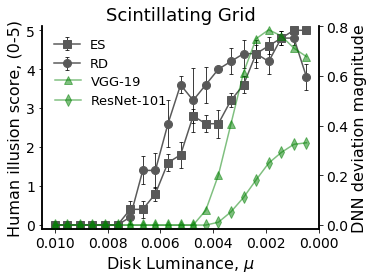

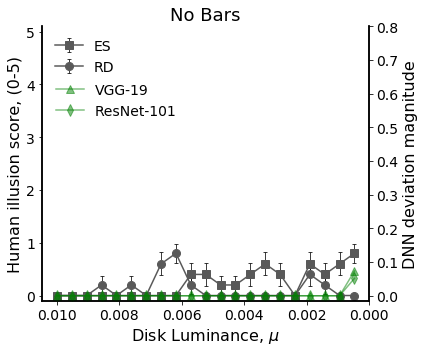

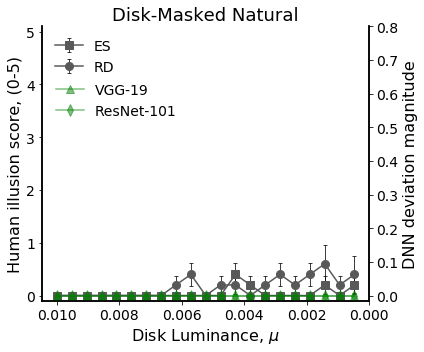

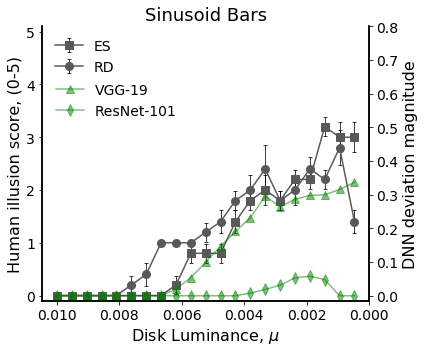

In [25]:
# Plot both subject responses alongside DNN illusion scores

# SG
fig, ax1 = plt.subplots(figsize=(5.3,4))
ax2 = ax1.twinx()
ax1.set_title('Scintillating Grid',fontsize=18)
ax1.errorbar(list(SG_ES['whiteness']/100)[::-1], list(SG_ES['score']), yerr=(SG_ES['stdev']/np.sqrt(5)), 
             color='0.35', marker='s', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='ES')
ax1.errorbar(list(SG_RD['whiteness']/100)[::-1], list((SG_RD['score'])), yerr=(SG_RD['stdev']/np.sqrt(5)), 
             color='0.35', marker='o', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='RD')
ax2.plot(list(SG_ES['whiteness']/100)[::-1], SG_diss, color='g', alpha=0.5, marker='^', markersize=8, label='VGG-19')
ax2.plot(list(NL_ES['whiteness']/100)[::-1], SG_diss_res, color='g', alpha=0.5, marker='d', markersize=8, label='ResNet-101')
ax1.set_xlabel('Disk Luminance, '+r'$\mu$',fontsize=16)
ax1.set_ylabel('Human illusion score, (0-5)',fontsize=16)
ax2.set_ylabel('DNN deviation magnitude',fontsize=16)
ax1.legend(loc='upper left',fontsize=13, frameon=False)
ax2.legend(loc='center left',fontsize=13, bbox_to_anchor=(0.003, 0.68), frameon=False)
ax1.set_ylim(-0.1,5.1)
ax2.set_ylim(-0.015,0.8)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/human_results/WtoB_SG2.png', dpi=800)
plt.show()

# NL
fig, ax1 = plt.subplots(figsize=(6,5))
ax2 = ax1.twinx()
ax1.set_title('No Bars',fontsize=18)
ax1.errorbar(list(NL_ES['whiteness']/100)[::-1], list(NL_ES['score']), yerr=(NL_ES['stdev']/np.sqrt(5)), 
             color='0.35', marker='s', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='ES')
ax1.errorbar(list(NL_RD['whiteness']/100)[::-1], list((NL_RD['score'])), yerr=(NL_RD['stdev']/np.sqrt(5)), 
             color='0.35', marker='o', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='RD')
ax2.plot(list(NL_ES['whiteness']/100)[::-1], NL_diss, color='g', alpha=0.5, marker='^', markersize=8, label='VGG-19')
ax2.plot(list(NL_ES['whiteness']/100)[::-1], NL_diss_res, color='g', alpha=0.5, marker='d', markersize=8, label='ResNet-101')
ax1.set_xlabel('Disk Luminance, '+r'$\mu$',fontsize=16)
ax1.set_ylabel('Human illusion score, (0-5)',fontsize=16)
ax2.set_ylabel('DNN deviation magnitude',fontsize=16)
ax1.legend(loc='upper left',fontsize=14, frameon=False)
ax2.legend(loc='center left',fontsize=14, bbox_to_anchor=(0.003, 0.73), frameon=False)
ax1.set_ylim(-0.1,5.1)
ax2.set_ylim(-0.015,0.8)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/human_results/WtoB_NL2.png', dpi=800)
plt.show()

# MC
fig, ax1 = plt.subplots(figsize=(6,5))
ax2 = ax1.twinx()
ax1.set_title('Disk-Masked Natural',fontsize=18)
ax1.errorbar(list(MC_ES['whiteness']/100)[::-1], list(MC_ES['score']), yerr=(MC_ES['stdev']/np.sqrt(5)), 
             color='0.35', marker='s', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='ES')
ax1.errorbar(list(MC_RD['whiteness']/100)[::-1], list((MC_RD['score'])), yerr=(MC_RD['stdev']/np.sqrt(5)), 
             color='0.35', marker='o', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='RD')
ax2.plot(list(MC_ES['whiteness']/100)[::-1], MC_diss, color='g', alpha=0.5, marker='^', markersize=8, label='VGG-19')
ax2.plot(list(MC_ES['whiteness']/100)[::-1], MC_diss_res, color='g', alpha=0.5, marker='d', markersize=8, label='ResNet-101')
ax1.set_xlabel('Disk Luminance, '+r'$\mu$',fontsize=16)
ax1.set_ylabel('Human illusion score, (0-5)',fontsize=16)
ax2.set_ylabel('DNN deviation magnitude',fontsize=16)
ax1.legend(loc='upper left',fontsize=14, frameon=False)
ax2.legend(loc='center left',fontsize=14, bbox_to_anchor=(0.003, 0.73), frameon=False)
ax1.set_ylim(-0.1,5.1)
ax2.set_ylim(-0.015,0.8)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/human_results/WtoB_MC2.png', dpi=800)
plt.show()

# SL
fig, ax1 = plt.subplots(figsize=(6,5))
ax2 = ax1.twinx()
ax1.set_title('Sinusoid Bars',fontsize=18)
ax1.errorbar(list(SL_ES['whiteness']/100)[::-1], list(SL_ES['score']), yerr=(SL_ES['stdev']/np.sqrt(5)), 
             color='0.35', marker='s', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='ES')
ax1.errorbar(list(SL_RD['whiteness']/100)[::-1], list((SL_RD['score'])), yerr=(SL_RD['stdev']/np.sqrt(5)), 
             color='0.35', marker='o', markersize=8, elinewidth=0.75, capsize=2.0, capthick=0.75, ecolor='k', 
             label='RD')
ax2.plot(list(SL_ES['whiteness']/100)[::-1], SL_diss, color='g', alpha=0.5, marker='^', markersize=8, label='VGG-19')
ax2.plot(list(SL_ES['whiteness']/100)[::-1], SL_diss_res, color='g', alpha=0.5, marker='d', markersize=8, label='ResNet-101')
ax1.set_xlabel('Disk Luminance, '+r'$\mu$',fontsize=16)
ax1.set_ylabel('Human illusion score, (0-5)',fontsize=16)
ax2.set_ylabel('DNN deviation magnitude',fontsize=16)
ax1.legend(loc='upper left',fontsize=14, frameon=False)
ax2.legend(loc='center left',fontsize=14, bbox_to_anchor=(0.003, 0.73), frameon=False)
ax1.set_ylim(-0.1,5.1)
ax2.set_ylim(-0.015,0.8)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/human_results/WtoB_SL2.png', dpi=800)
plt.show()